# PROYECTO EDA

<b>Autor: Gustavo Ucar de Armas</b>

### importamos todas las librerias necesarias para poder realizar el proyecto.

In [123]:
import pandas as pd
import collections
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Importo la libreria warning porque me sale una advertencia con lo que
#uso el filterwarnings para filtrar y ignorarla
import warnings
warnings.filterwarnings("ignore", "use_inf_as_na")

<b> Un Análisis Exploratorio de Datos enfocándose especialmente en responder la siguiente pregunta de negocio ¿Qué factores están relacionados con que los pasajeros tengan una mayor/menor probabilidad de sobrevivir? </b>

### Leemos el archivo para ver su contenido, ya sean numeros nulos y nombre de columnas y filas.

In [124]:
db = pd.read_csv("titanic.csv")

print(db)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

### Vemos el nombre de las columnas que tenemos para poder realizar el analisis

In [125]:
print(db.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


### tras ver los datos que tenemos cogere el passengerid como index de los datos.

In [126]:
#tras ver los datos que tenemos cogere el passengerid como index de los datos.
db.set_index("PassengerId", inplace=True )

#imprimimos las 12 columnas que tenemos ya con el PassengerId como indice de nuestra tabla.
db.head(12)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


### Eliminamos los nulos de las columnas Cabin, Age y embarked

In [127]:
#como observamos en las columnas Cabin, Age y embarked existen nulos y he tomado la decision de quitar los nulos
#para tener el analisis correcto.
db = pd.DataFrame(db)
#Se borran los Nulos 
db.dropna(inplace=True)
db.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [128]:
#una vez quitado todos los nulos de las columnas anteriormente descritas vuelvo a analizar los datos
#debemos proceder a ver los outlier.
db = db[~db["Cabin"].isnull()]
db = db[~db["Age"].isnull()]
db = db[~db["Embarked"].isnull()]
print(db.isnull().sum())
print(db.shape)

#verifico en la tabla que en cabin no existe los NaN ni en ninguna otra
db.head(12)

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64
(183, 11)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C


# OUTLIER

## Analisis Univariado

### vemos el analisis univariado del outlier de nuestros datos, filtrado por tarifa

In [129]:
#vemos el analisis univariado del outlier de nuestros datos, filtrado por tarifa
db.Fare.value_counts()

Fare
26.5500     7
53.1000     5
90.0000     4
10.5000     4
13.0000     4
           ..
211.5000    1
8.0500      1
81.8583     1
27.7500     1
5.0000      1
Name: count, Length: 93, dtype: int64

### Normalizamos los valores para poder representarlo en una grafica.

In [130]:
#Normalizamos los valores para poder representarlo en una grafica.
db.Fare.value_counts(normalize=True)

Fare
26.5500     0.038251
53.1000     0.027322
90.0000     0.021858
10.5000     0.021858
13.0000     0.021858
              ...   
211.5000    0.005464
8.0500      0.005464
81.8583     0.005464
27.7500     0.005464
5.0000      0.005464
Name: proportion, Length: 93, dtype: float64

### Realizamos una gráfica para ver los outliers, obteniendo fuera de lo normal representado por circulos todos
<b>Los outlier de la columna tarifa/fare</b>

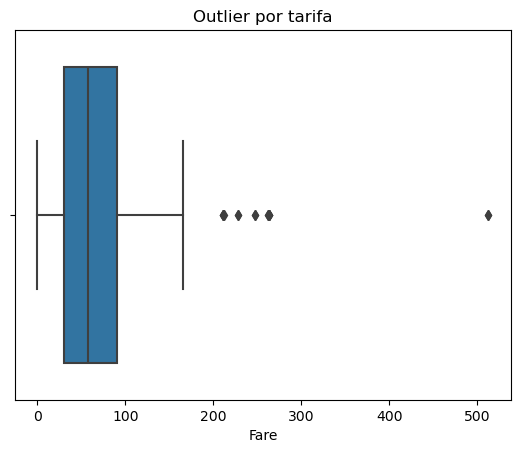

In [131]:
grafica_oulier= sns.boxplot(x = "Fare", data = db).set(title='Outlier por tarifa')

### realizaremos otra gráfica para ver por ejemplo en una grafica de barras,
<b>por el puerto que embarcaron (C = Cherbourg; Q = Queenstown; S = Southampton)
de esta gráfica deducimos que la mayoria salieron de Southamton</b>

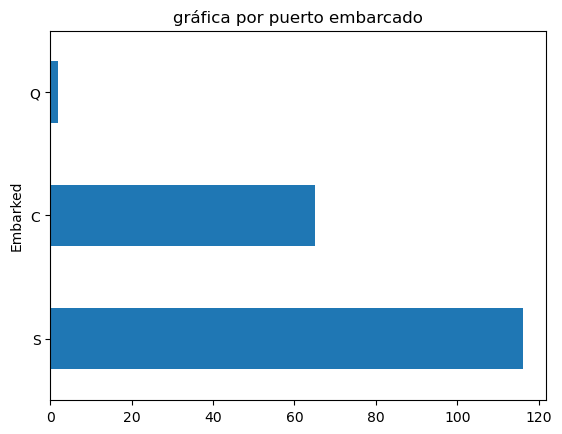

In [132]:
#creamos la grafica segun el embarked(puerto embarcado), normalizamos los datos y la representamos
db.Embarked.value_counts(normalize=True)
db.Embarked.value_counts().plot.barh().set(title="gráfica por puerto embarcado")
plt.show()

### por ultimo veremos en una gráfica circular cuantos eran hombre y cuantas eran mujeres según su titulo Miss, MR, MRS

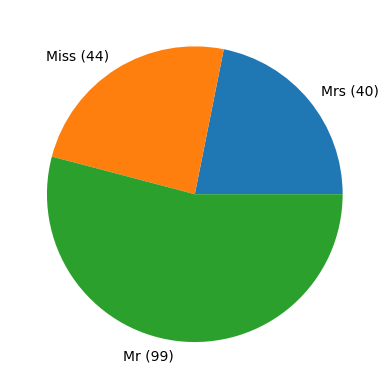

In [133]:
#creamos las variables, las inicializamos y recorremos la columna Nombre de la base datos
contador_Mrs=0
contador_Miss=0
contador_Mr=0
for i in db["Name"]:
    if "Mrs" in i:
        contador_Mrs+=1
    elif "Miss" in i:
        contador_Miss+=1
    else:
        contador_Mr+=1

#creamos la lista
titulo=[contador_Mrs, contador_Miss, contador_Mr]

#creamos la gráfica
nombres =["Mrs ("+str(contador_Mrs)+")","Miss ("+str(contador_Miss)+")","Mr ("+str(contador_Mr)+")"]
plt.pie(titulo , labels = nombres)
plt.show()


<Axes: xlabel='Fare', ylabel='Count'>

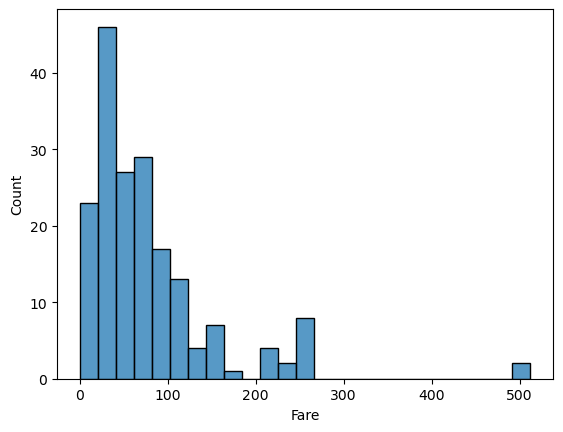

In [134]:
sns.histplot(db['Fare'])

## Analisis Bivariado

### Creamos una gráfica SCATTER con Edad y Tarifa para ver que tarifas eligieron segun su edad

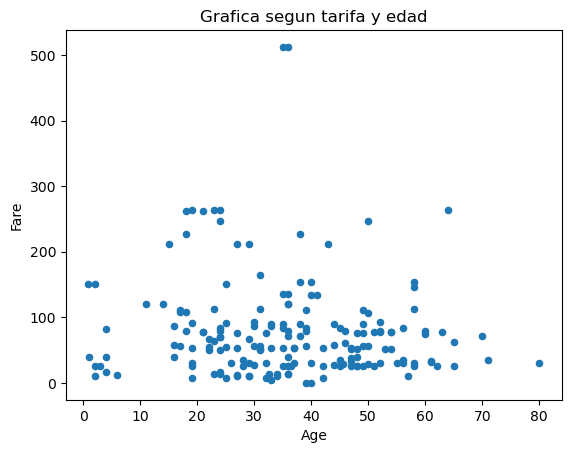

In [357]:
# en esta grafica podemos concluir que la mayoria de las 
# personas entre 0 y 80 años pagaron un precio inferior a 300
# y que solo dos personas entre 30 y 40 años pagaron 500
# y que nadie pago 400

db.plot.scatter(x="Age" , y="Fare").set_title("Grafica segun tarifa y edad")
plt.show()

### Se realiza una grafica Pair Plot con Tarifa, Puerto de Embarque y Edad 

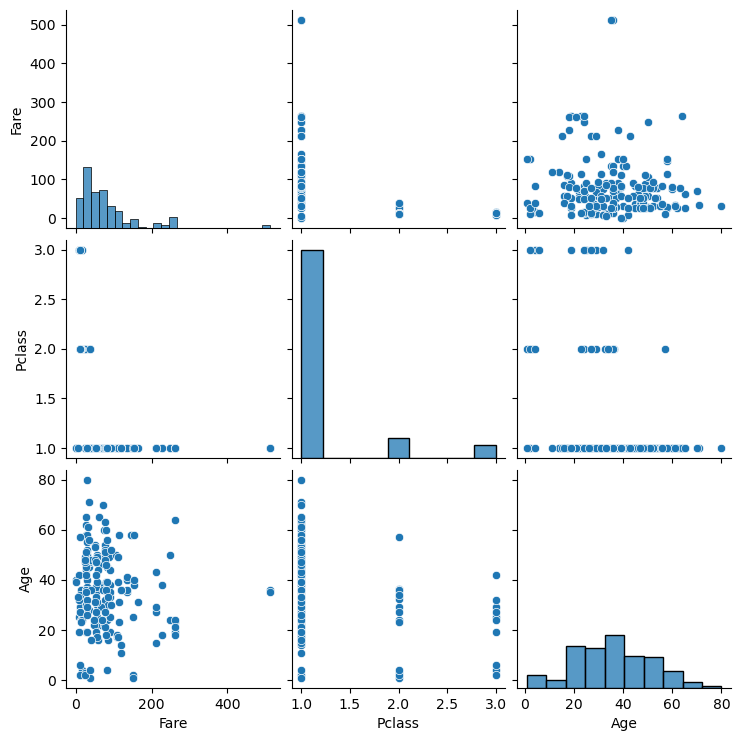

In [358]:
sns.pairplot(db, vars=["Fare","Pclass", "Age"])
plt.show()

### Se crea una matriz de correlacion

<b> Eliminamos las columnas que sean Objeto o String y solo dejamos las INT y las FLoat</b>

In [359]:
#tenemos que eliminar las columnas de string para hacer la tabla de correlación
#ademas borramos la PassengerId ya que esta no nos hace falta para el mapa calor.
#Creo una copia del archivo ya que voy a borrar datos y no quiero perder los datos del original
dc = db.to_csv("Titanic_Copia.csv")
dc = pd.read_csv("Titanic_Copia.csv")
dc = dc.drop("Name", axis=1)
dc = dc.drop("Sex", axis=1)
dc = dc.drop("Cabin", axis=1)
dc = dc.drop("Embarked", axis=1)
dc = dc.drop("Ticket", axis=1)
dc = dc.drop("PassengerId", axis=1)

#Obtengo la información de la tabla para ver si existe algun dato que sea tipo Objeto y no tipo Float o int para poder realizar la correlacion
dc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  183 non-null    int64  
 1   Pclass    183 non-null    int64  
 2   Age       183 non-null    float64
 3   SibSp     183 non-null    int64  
 4   Parch     183 non-null    int64  
 5   Fare      183 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 8.7 KB


## Resultado de la Matriz de Correlación

<b>tras borrar todas las columnas que no son necesarias quedaron 
Sobrevivió, clase de pasajero , años, num hermanos/conyuges(SibSp), num parientes(parch), tarifa</b>

In [360]:
#tras borrar todas las columnas que no son necesarias quedaron 
#Sobrevivió, clase de pasajero , años, num hermanos/conyuges(SibSp), num parientes(parch), tarifa
dc_matrix = dc.corr()
dc_matrix

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.034542,-0.254085,0.106346,0.023582,0.134241
Pclass,-0.034542,1.000000,-0.306514,-0.103592,0.047496,-0.315235
Age,-0.254085,-0.306514,1.000000,-0.156162,-0.271271,-0.092424
SibSp,0.106346,-0.103592,-0.156162,1.000000,0.255346,0.286433
Parch,0.023582,0.047496,-0.271271,0.255346,1.000000,0.389740
Fare,0.134241,-0.315235,-0.092424,0.286433,0.389740,1.000000


### Ahora creamos un Mapa de Calor

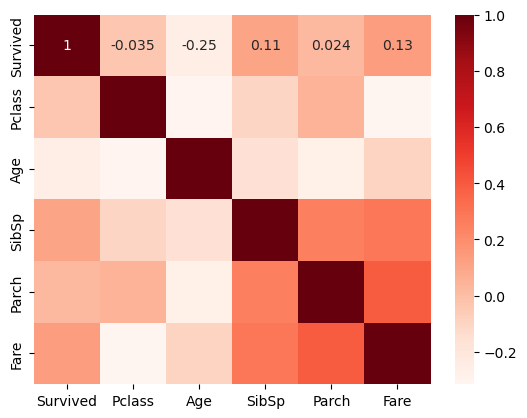

In [361]:
sns.heatmap(dc_matrix, annot=True, cmap = "Reds")
plt.show()

#### Relaciones entre variables categóricas y numericas

<b>He sacado la variable categorica de estas dos columnas, tarifa y el sexo de quien viaja
de este modo obtendremos cuantas mujeres y hombres pagaron</b>

In [362]:
db.groupby('Sex')['Fare'].mean()

Sex
0    89.000900
1    69.124343
Name: Fare, dtype: float64

<b> Observamos que la mediana que se paga segun el sexo es la siguiente.</b>

In [363]:
db.groupby('Sex')['Fare'].median()

Sex
0    77.9583
1    51.8625
Name: Fare, dtype: float64

<b> Donde observamos que, el sexo femenino paga o ha pagado mas por viajar que el sexo masculino o ha pagado
mejor clase para viajar</b>

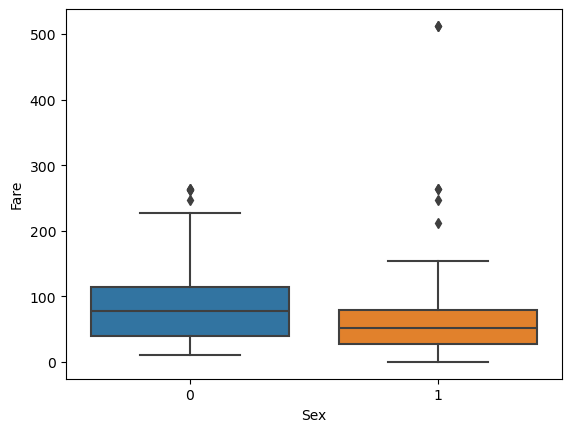

In [364]:
sns.boxplot(x=db.Sex, y=db.Fare)
plt.show()

<b>Sacamos la misma estadistica usando una gráfica violinista.</b>

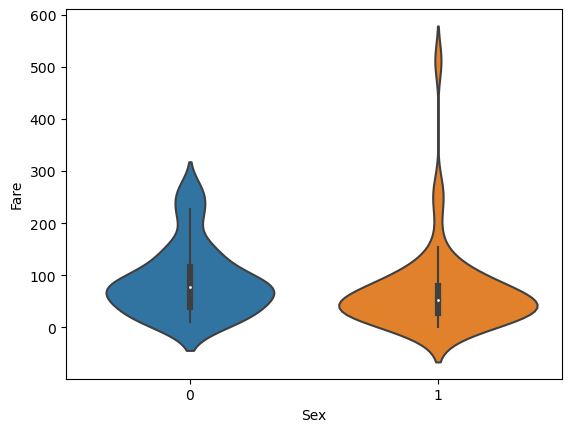

In [356]:
sns.violinplot(x=db.Sex, y=db.Fare)
plt.show()

### Analisis bivariado entre variables categóricas

<b>para ello convertiremos el sexo en una variable binaria y veremos el impacto existente</b>

In [164]:
db['Sex'] = np.where(db.Sex=='male',1,0)
db.Sex.value_counts()

Sex
1    95
0    88
Name: count, dtype: int64

<b>Según los resultados, el 95 han sido masculinos y 88 femeninos.</b>

<b>Ahora veremos como se distribullen estos sexos segun las clases</b>

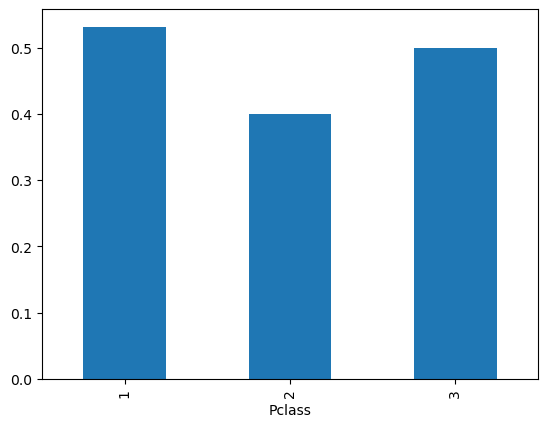

In [165]:
db.groupby('Pclass')['Sex'].mean().plot.bar()
plt.show()

<b>Donde nos indican que casi todas las clases estan practicamente iguales, siendo la primera y la tercera las mas vendidas </b>

<b>Ahora veremos en un diagrama de barras cuantos han sobrevivido segun el sexo, 
segun vemos,sobrevivieron mas mujeres que hombre.</b>

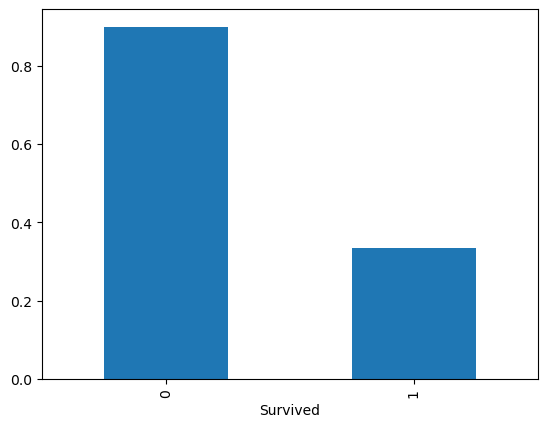

In [166]:
db.groupby('Survived')['Sex'].mean().plot.bar()
plt.show()

### Analisis multivariado

<b>Ahora hago el analisis tomando como index las diferentes clases, como columnas el sexo y el valor cuantos sobrevivieron</b>

In [227]:
result = pd.pivot_table(data=db, index='Pclass', columns='Sex',values='Survived')
result

Sex,0,1
Pclass,,
1,0.959459,0.416667
2,0.888889,0.666667
3,0.600000,0.400000


<b>Según el resultado podemos ver que masculino, en primera clase sobrevivieron 0,416 frente a las 0,959 que fueron mujeres
de segunda clase 0,666 fueron hombres frente a las 0,888 fueron mujeres y por último, la tercera clase sobrevivio
0,40 hombres frente a las 0,60 mujeres.</b>

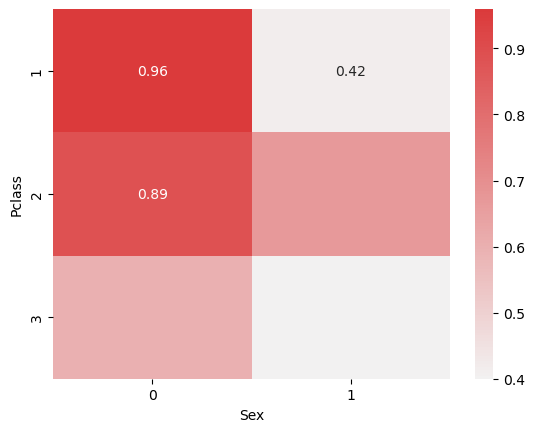

In [251]:
sns.heatmap(result, annot=True, cmap =sns.diverging_palette(20, 12, n=256), center=0.4)
plt.show()

# Entrena un algoritmo de Regresión Logística para que sea capaz de clasificar adecuadamente a los pasajeros entre los que sobrevivieron y no sobrevivieron (variable "Survived")

<b>importamos las librerias necesarias</b>

In [302]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

<b>Escogemos las variables que tiene sentido usar como input al modelo</b>

In [303]:
Eje_x = db[[ 'Survived', 'Pclass','Age','SibSp','Parch','Fare']].copy(deep=True)

<b>Escogemos la variable que vamos usar para la predicción</b>

In [304]:
Eje_y = db[["Survived"]].copy(deep=True)

<b>Estandarizamos los valores para ponerlos comprendidos entre -1 y 1</b>

<b>Cogemos todas las columnas numéricas y dejamos fuera las que son type objeto.</b>

In [305]:
numeric_var_list = ['Survived', 'Pclass','Age','SibSp','Parch','Fare']

<b>Creamos el eje de las X comprendido entre -1 y 1 con una lista de variables que ya mencionamos antes</b>

In [306]:
scaler_dict = {}
for num_var in numeric_var_list:
    se = StandardScaler()
    Eje_x[num_var] = se.fit_transform(Eje_x[num_var].to_numpy().reshape(-1,1))
    scaler_dict[num_var] = se

<b>Obtenemos la siguiente gráfica donde tras estandarizar los valores todos estan entre -1 y 1</b>

In [307]:
Eje_x

,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,,
2,0.698430,-0.372256,0.149065,0.833628,-0.631730,-0.097180
4,0.698430,-0.372256,-0.043230,0.833628,-0.631730,-0.335997
7,-1.431782,-0.372256,1.174636,-0.723044,-0.631730,-0.352250
11,0.698430,3.520480,-2.030273,0.833628,0.697081,-0.814070
12,0.698430,-0.372256,1.431029,-0.723044,-0.631730,-0.684702
...,...,...,...,...,...,...
872,0.698430,-0.372256,0.725949,0.833628,0.697081,-0.343166
873,-1.431782,-0.372256,-0.171426,-0.723044,-0.631730,-0.967737
880,0.698430,-0.372256,1.302832,-0.723044,0.697081,0.058785


<b>Ahora creamos el eje de las Y, donde cogeremos la variable Survived.</b>

In [308]:
Datos_for_corr = Eje_x.copy()
Datos_for_corr["Survived"] = Eje_y

<b>creamos la correlación entre las variables.</b>

In [309]:
corr_matrix = Datos_for_corr.corr()

<b>Creamos un mapa de calor, con ambas ejes, dando el siguiente resultado</b>

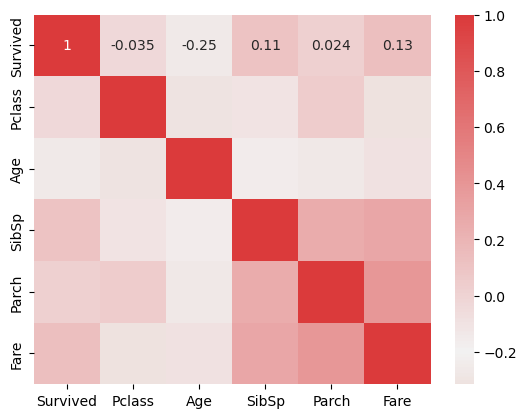

In [325]:
sns.heatmap(corr_matrix, annot=True, cmap = sns.diverging_palette(20, 12, n=256), center = -0.2)
plt.show()

<b>Ahora creamos las variables de entrenamiento y predicción</b>

In [327]:
Eje_x_train, Eje_x_test, Eje_y_train, Eje_y_test = train_test_split(Eje_x, Eje_y, test_size=0.2)

<b>Usaremos la Logistica de Regresión</b>

In [328]:
logisticRegr = LogisticRegression()

In [339]:
logisticRegr.fit(Eje_x_train, Eje_y_train.values.ravel())

LogisticRegression()

<b>Ahora creamos una funcion para que la prediccion sea lo mas exacta posible</b>

In [340]:
def accuracy(ground_truth, predictions):
    comp = list(ground_truth == predictions)
    n_true = comp.count(True)
    n_false = comp.count(False)
    return n_true/(n_true + n_false)

In [331]:
predictions_train = logisticRegr.predict(Eje_x_train)
ground_truth_train = Eje_y_train.to_numpy().reshape(-1)

<b>Según este algoritmo nos indica que tenemos un 100% de acierto para el entrenamiento</b>

In [332]:
accuracy(ground_truth_train, predictions_train)

1.0

In [333]:
predictions_test = logisticRegr.predict(Eje_x_test)
ground_truth_test = Eje_y_test.to_numpy().reshape(-1)

<b>Según el resultado obtenido en la métrica de validación tenemos un 100% de predicción,
siendo un resultado muy bueno</b>

In [334]:
accuracy(ground_truth_test, predictions_test)

1.0